In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel("C:/Users/dell 3400/Documents/Rihanpro.xlsx")
df=pd.DataFrame(data)
df.drop(['Status','unnamed1'],axis=1,inplace=True)  
#drop unusable column from data frame
print(df)




       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [3]:
print(df["User_ID"].isnull().sum())
#df.info()

df.dropna(inplace=True)
df.head(5)
df.isnull().sum()

0


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [68]:
#change data type of a particular column using astype method
df['Amount']=df['Amount'].astype(int)
df['Amount'].dtypes


dtype('int64')

In [28]:
#use describe method with our data
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [31]:
df[['Age','Orders','Amount']].describe()


,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [34]:
#Expolatry data anlysis
#Gender
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [72]:
gb=df.groupby(['Gender'])['Amount'].sum()
gb

Series([], Name: Amount, dtype: int64)

C:\Users\dell 3400\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


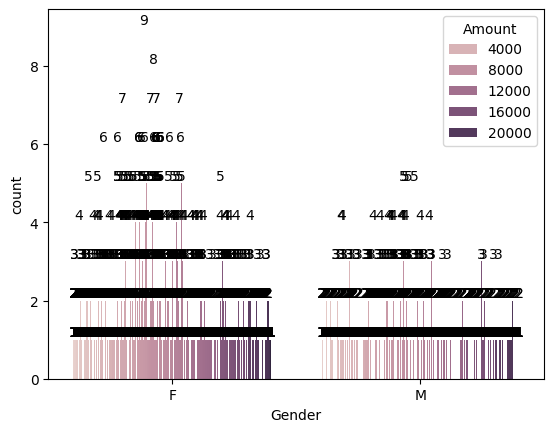

In [9]:
#In for loop we are make a contaner store all under
ax=sns.countplot(data=df,x="Gender",hue='Amount')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

    

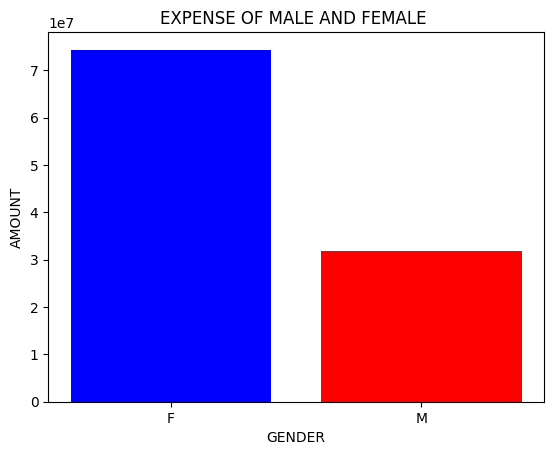

In [55]:
plt.bar(gb.index,gb.values,color=['blue','red'])
plt.xlabel("GENDER")
plt.ylabel("AMOUNT")
plt.title('EXPENSES OF MALE AND FEMALE ')
plt.show()

In [3]:
#VISUALIZE EXPENSE AMOUNT BASED ON AGE GROUP
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

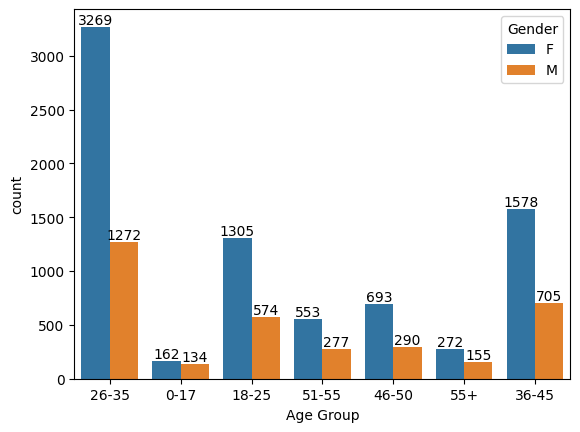

In [7]:
#cl=["BLUE","RED","YELLOW","GREEN","SKYBLUE","YELLOW","GREEN","red"]
ax=sns.countplot(x='Age Group',data=df,hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


       Zone       Amount
0   Central  41600873.45
1   Eastern   7049213.00
2  Northern  12618752.00
3  Southern  26606668.98
4   Western  18373625.00


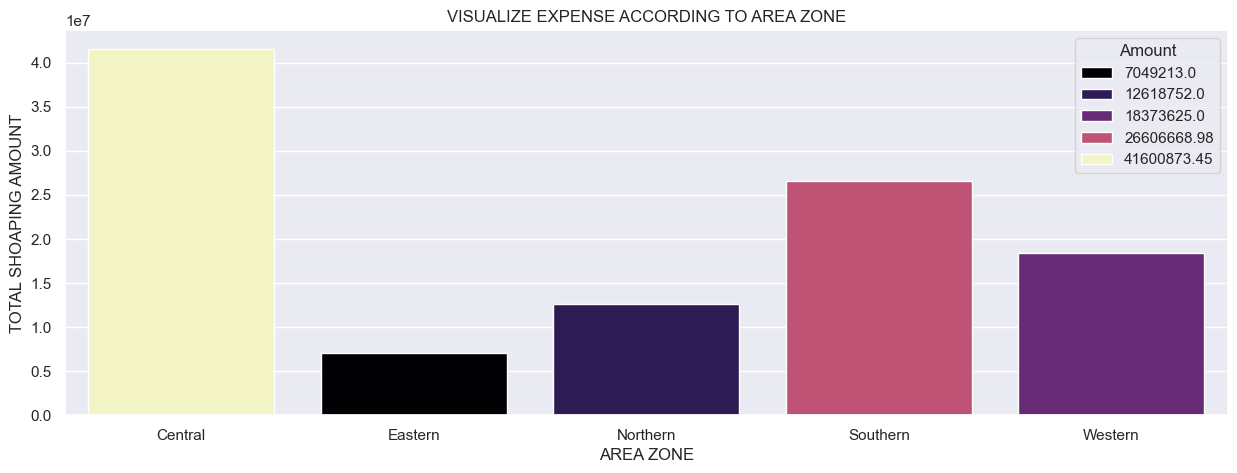

In [62]:
gb2=df.groupby(['Zone'],as_index=False)['Amount'].sum()
print(gb2)
sns.barplot(data=gb2,x='Zone',y='Amount',palette='magma',hue='Amount')
plt.xlabel("AREA ZONE")
plt.ylabel("TOTAL SHOAPING AMOUNT")
plt.title("VISUALIZE EXPENSE ACCORDING TO AREA ZONE")
plt.show()

  Age Group       Amount
2     26-35  42613443.94
3     36-45  22144995.49
1     18-25  17240732.00
4     46-50   9207844.00
5     51-55   8261477.00
6       55+   4080987.00
0      0-17   2699653.00


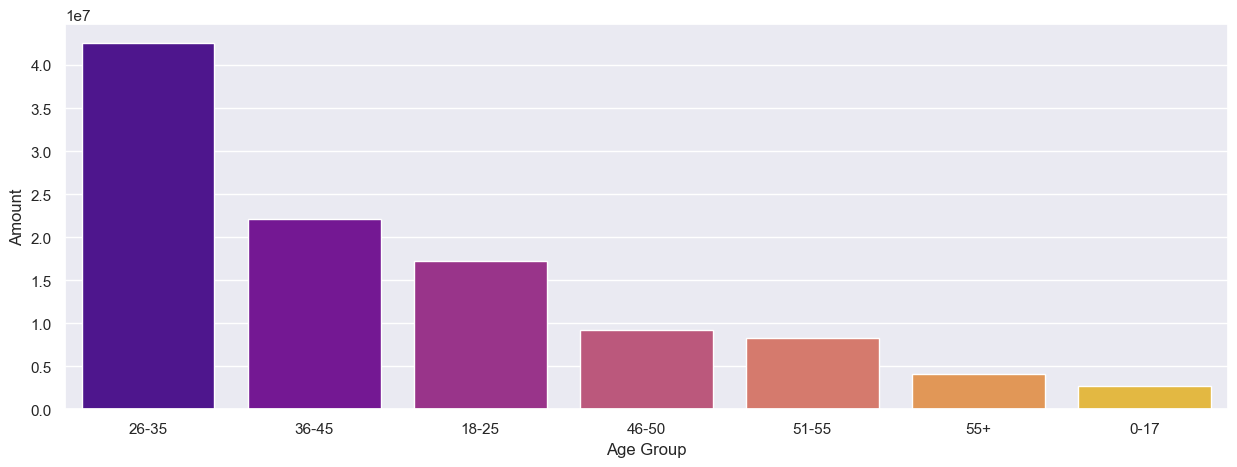

In [57]:
gb3=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=gb3,palette='plasma',hue='Age Group')
print(gb3)

In [38]:
#State
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [40]:
gb4=df.groupby(['State'],as_index=False)['Orders'].count().sort_values(by='Orders',ascending=True)
gb4

,State,Orders
13,Telangana,125
11,Punjab,200
12,Rajasthan,231
15,Uttarakhand,320
6,Jharkhand,380
3,Gujarat,427
1,Bihar,434
4,Haryana,452
8,Kerala,453
5,Himachal Pradesh,608


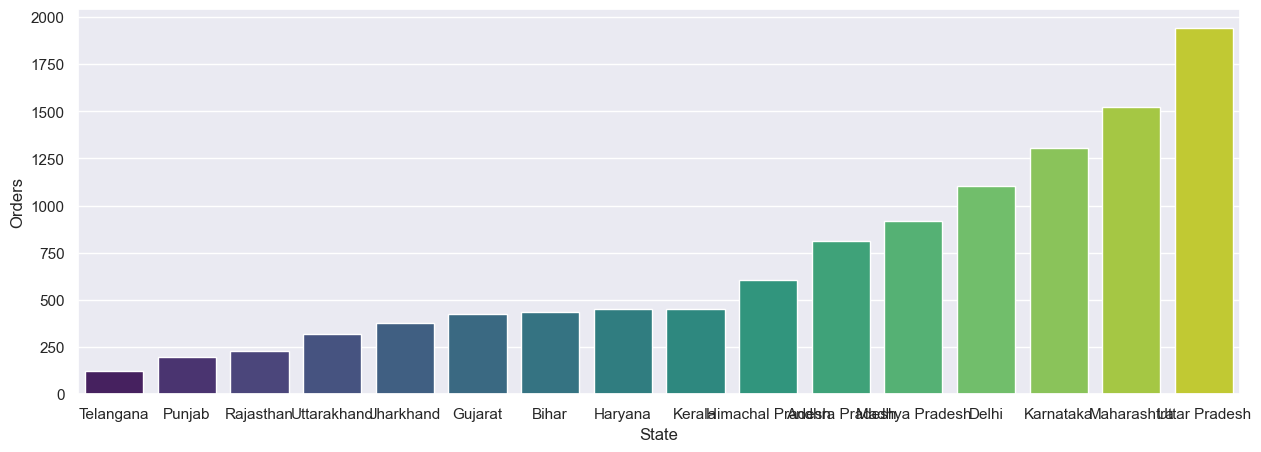

In [53]:
#show the oreders according to the state

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=gb4,x='State',y='Orders',palette='viridis',hue='State')
plt.show()


In [65]:
#show the Amount according to the state
gb5=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=True)
gb5


,State,Amount
13,Telangana,1151490.00
11,Punjab,1525800.00
12,Rajasthan,1909409.00
15,Uttarakhand,2520944.00
6,Jharkhand,3026456.00
8,Kerala,3894491.99
3,Gujarat,3946082.00
1,Bihar,4022757.00
4,Haryana,4220175.00
5,Himachal Pradesh,4963368.00


<Axes: xlabel='State', ylabel='Amount'>

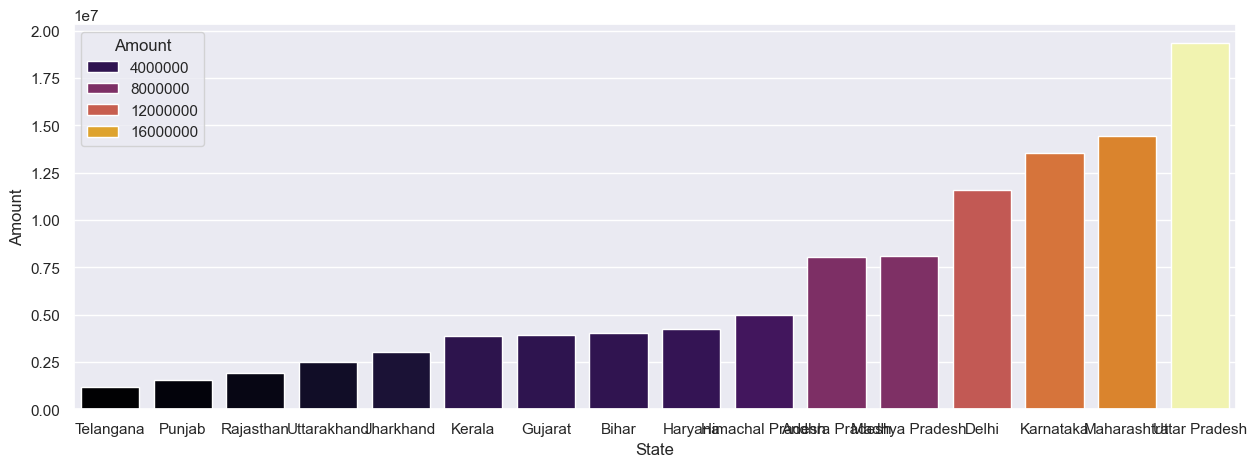

In [67]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=gb5,x='State',y='Amount',hue='Amount',palette='inferno')

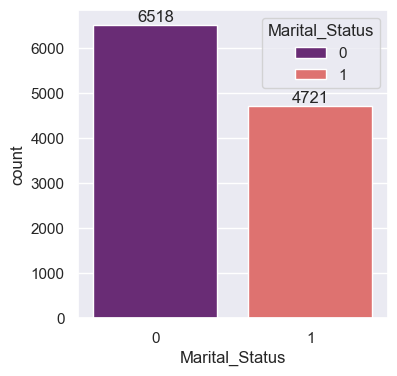

In [78]:
#see the count of people according to  Marital status
sns.set(rc={'figure.figsize':(4,4)})
ax=sns.countplot(data=df,x='Marital_Status',palette="magma",hue='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

In [87]:
#see the sum of Amount of people according to marital status 
gb6=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum()
gb6

,Marital_Status,Gender,Amount
0,0,F,43786648.44
1,0,M,18338738.00
2,1,F,30549207.99
3,1,M,13574538.00


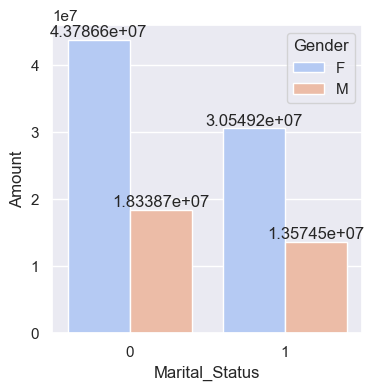

In [88]:
ax=sns.barplot(data=gb6,x='Marital_Status',y='Amount',hue='Gender',palette='coolwarm')
for i in ax.containers:
    ax.bar_label(i)

C:\Users\dell 3400\AppData\Local\Temp\ipykernel_18244\3236076570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='Occupation',palette="magma")


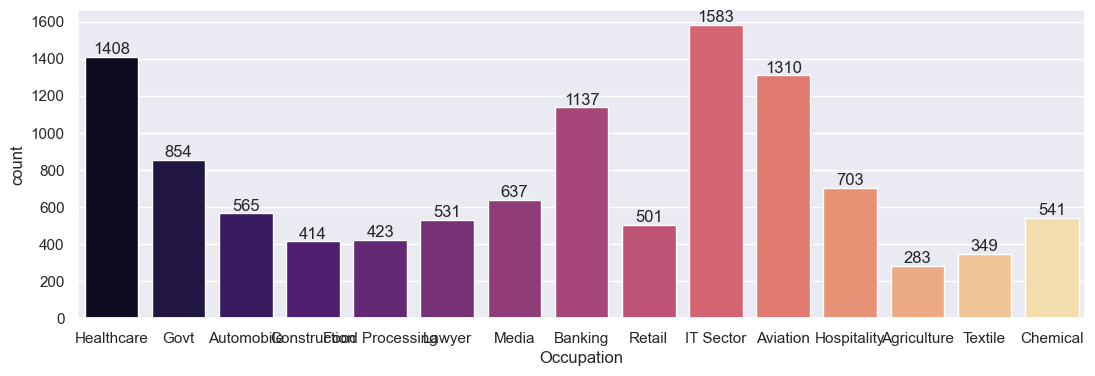

In [94]:
sns.set(rc={'figure.figsize':(13,4)})
ax=sns.countplot(data=df,x='Occupation',palette="magma")
for bars in ax.containers:
    ax.bar_label(bars)

In [97]:
print(df['Product_Category'])

0              Auto
1              Auto
2              Auto
3              Auto
4              Auto
            ...    
11246        Office
11247    Veterinary
11248        Office
11249        Office
11250        Office
Name: Product_Category, Length: 11239, dtype: object
